## Exercise 1.1: tidying a dataset.
Inspect the dataset contained in the le runtimes.csv and import it into Python as a pandas
dataframe. Note that one variable (the number of threads) is encoded in column names. Bring
this dataset into tidy form, as described in https://r4ds.hadley.nz/data-tidy.html using
functions such as pandas.melt (and some post-processing with auxiliary functions). Make sure
that columns in the resulting dataframe have meaningful names and dtypes.

In [59]:
import pandas as pd


df = pd.read_csv("runtimes.csv", skiprows = 4)


# Melt the data frame
df_melted = pd.melt(df,id_vars=["algo","size"],var_name ='threads',value_name='time')

df_melted['threads']= df_melted['threads'].str.extract(r'time(\d+)').astype(int)


df_processed = df_melted.dropna()
print(df_processed)

           algo     size  threads         time
0   distributed     4096        1     3.736606
1   distributed    16384        1    14.792794
2   distributed    65536        1    59.123347
3   distributed   262144        1   240.747448
4   distributed  1048576        1  1097.788352
5   distributed  4194304        1  4845.007061
6        single     4096        1     3.622693
7        single    16384        1    26.792361
8        single    65536        1   127.812326
9        single   262144        1   281.994783
10  distributed     4096        2     2.133074
11  distributed    16384        2     7.894031
12  distributed    65536        2    30.762486
13  distributed   262144        2   124.448679
14  distributed  1048576        2   567.038172
15  distributed  4194304        2  2501.408669
20  distributed     4096        3     1.673441
21  distributed    16384        3     5.681171
22  distributed    65536        3    21.436608
23  distributed   262144        3    85.384094
24  distribut

## Exercise 1.2: basic transformations and visualizations.
The file mpg-data.csv contains the mpg example dataset from the ggplot2 library (https:
//ggplot2.tidyverse.org/reference/mpg.html) which contains information about the fuel
effciency of various car models.

### 1. Import the dataset into Python via pandas and briey specify the dtype of each column(consult the documentation).


In [60]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


/Users/deepakbudha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/deepakbudha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/deepakbudha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/deepakbudha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/deepakbudha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/User

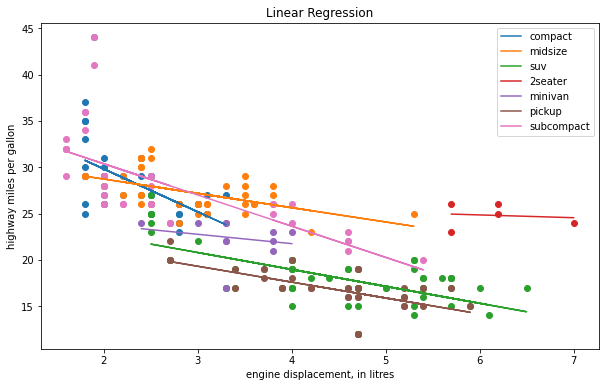

In [61]:
from tabulate import tabulate

df=pd.read_csv('mpg-data.csv')
#linear regression: instead of using spilit data, used main data and looped over each class
clas= df['class'].unique()
plt.figure(figsize=(10,6))
for C in clas:
    fdf=df[df['class']==C]
    x=[]
    y=[] 
    for d, h in zip(fdf['displ'], fdf['hwy']):
        x.append(float(d))
        y.append(float(h))
        m,c= np.polyfit(x,y,1)
    x= [float(a) for a in x]
    y_regression = [float(m)*xi + c for xi in x]

    # Plot the regression line
    plt.plot(x, y_regression,label=f'{C}')
    plt.scatter(x,y)
# Add labels and legend
plt.xlabel('engine displacement, in litres')
plt.ylabel('highway miles per gallon')
plt.title(f"Linear Regression")
plt.legend()

# Show plot
plt.show()


In [62]:
clas= df['class'].unique()
dict1={}
for c in clas:
    arr=[]
    fdf=df[df['class']==c]
    for d in fdf['hwy']:
        arr.append(d)
    dict1.update({c:np.median(d)})

year= df['year'].unique()

for c in year:
    arr=[]
    fdf=df[df['year']==c]
    for d in fdf['hwy']:
        arr.append(d)
    dict1.update({c:np.median(d)})
   
table = [[key, value] for key, value in dict1.items()]
print(tabulate(table, headers=['Class', 'Median'], tablefmt='grid'))

+------------+----------+
| Class      |   Median |
+============+==========+
| compact    |       24 |
+------------+----------+
| midsize    |       26 |
+------------+----------+
| suv        |       18 |
+------------+----------+
| 2seater    |       24 |
+------------+----------+
| minivan    |       23 |
+------------+----------+
| pickup     |       20 |
+------------+----------+
| subcompact |       29 |
+------------+----------+
| 1999       |       26 |
+------------+----------+
| 2008       |       26 |
+------------+----------+


# Exercise 1.3: hue rotation.
Import the photo of parrots used in the lecture (available at https://en.wikipedia.org/wik
i/File:BlueAndYellowMacaw_AraArarauna.jpg) in Python as shown in the lecture. Then for
a given angle φ ∈ [0, 2π), implement a function that converts the image to HSV space, applies a
rotation by angle φ to the hue channel (where φ = 2π would correspond to a whole rotation and
is thus equivalent to φ = 0), and transforms the resulting image back to RGB space. Apply this
function to the image for φ ∈ { k
2π
|k ∈ {0, 1, 2, 3, 4}} and visualize the obtained `rotated' images.

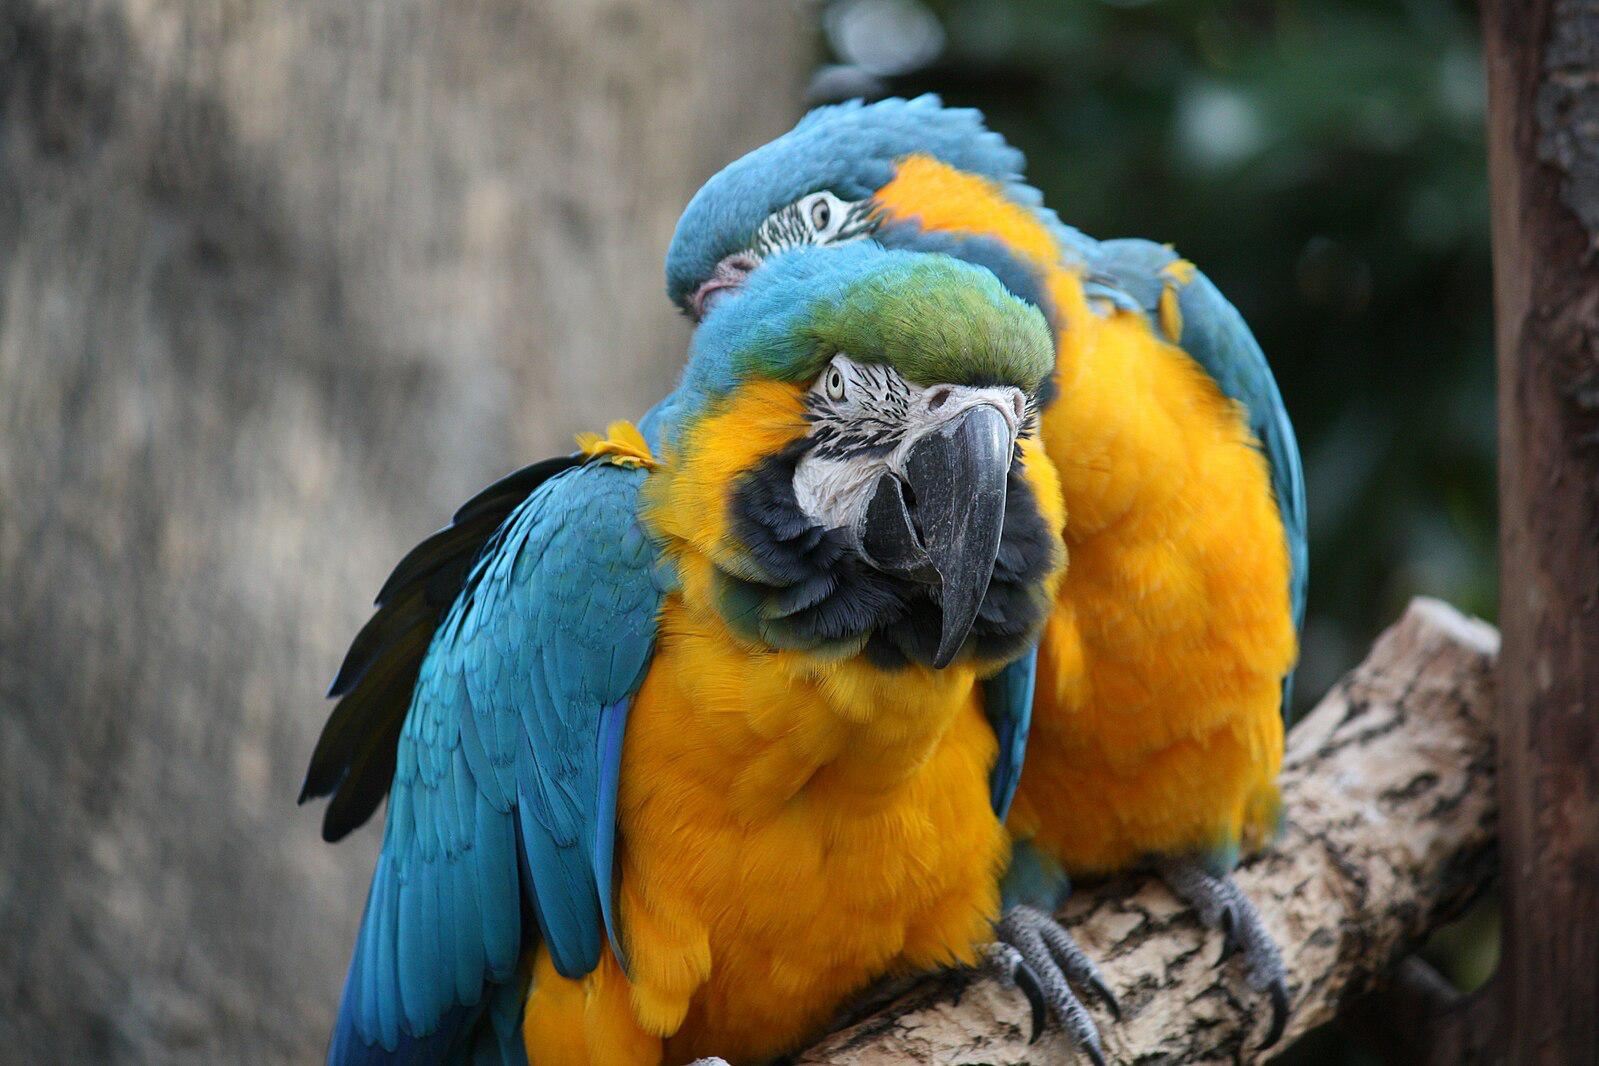

In [63]:
from PIL import Image

#loading the image
image_filename = "BlueAndYellowMacaw_AraArarauna.jpg"
image = Image.open(image_filename)
display(image)

In [64]:
# Converting the image to HSV space
def rotate_hue(image, angle):
    # Convert image to HSV
    image_hsv = image.convert("HSV")
   
    # Convert HSV image to NumPy array
    image_hsv_array = np.array(image_hsv)
    
    # Extract hue channel
    hue = image_hsv_array[:,:,0]
    
    # Apply rotation to hue channel
    rotated_hue = np.mod(hue + (180/np.pi * angle), 360)
    
    # Replace hue channel in HSV array
    image_hsv_array[:,:,0] = rotated_hue
    
    # Create rotated HSV image from array
    rotated_image_hsv = Image.fromarray(image_hsv_array, "HSV")
    
    # Convert rotated HSV image to RGB
    rotated_image_rgb = rotated_image_hsv.convert("RGB")
    
    return rotated_image_rgb


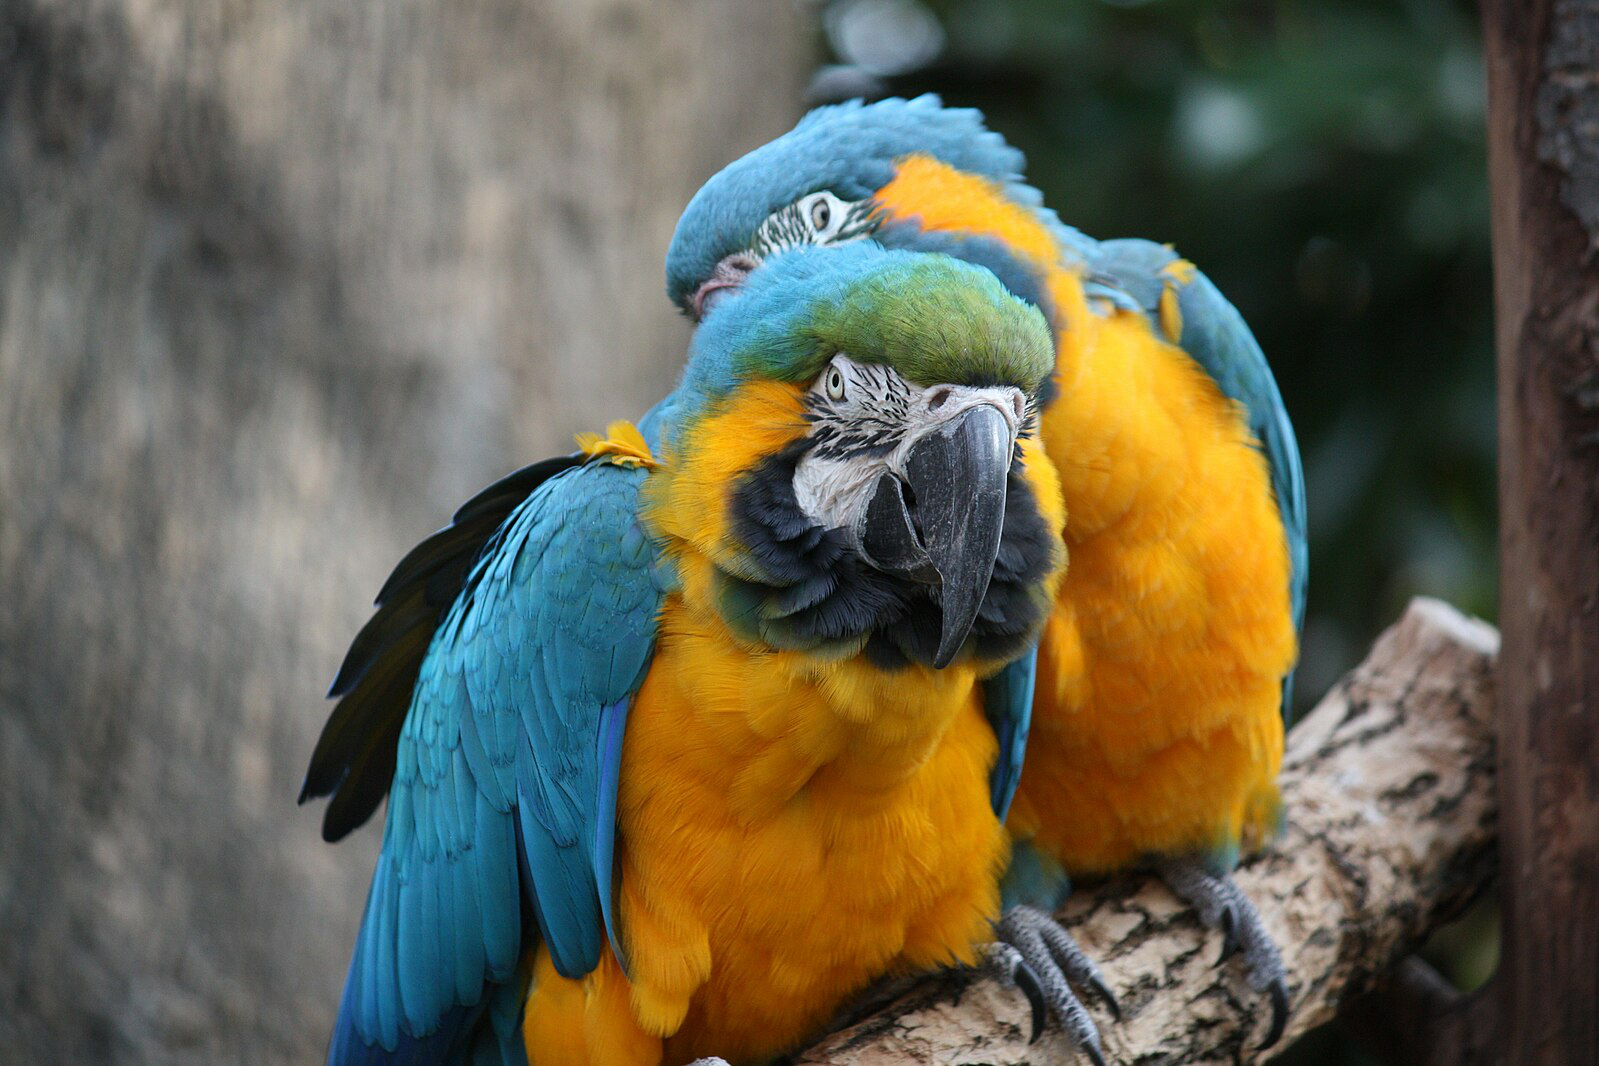

In [65]:
rotate_hue(image,2*np.pi)

In [66]:
#Apply this function to the image for φ ∈ { k 2π |k ∈ {0, 1, 2, 3, 4}} and visualize the obtained `rotated' images.

angles = [0, 1/2 * np.pi, 1/np.pi, 3*np.pi/2, 2*np.pi]

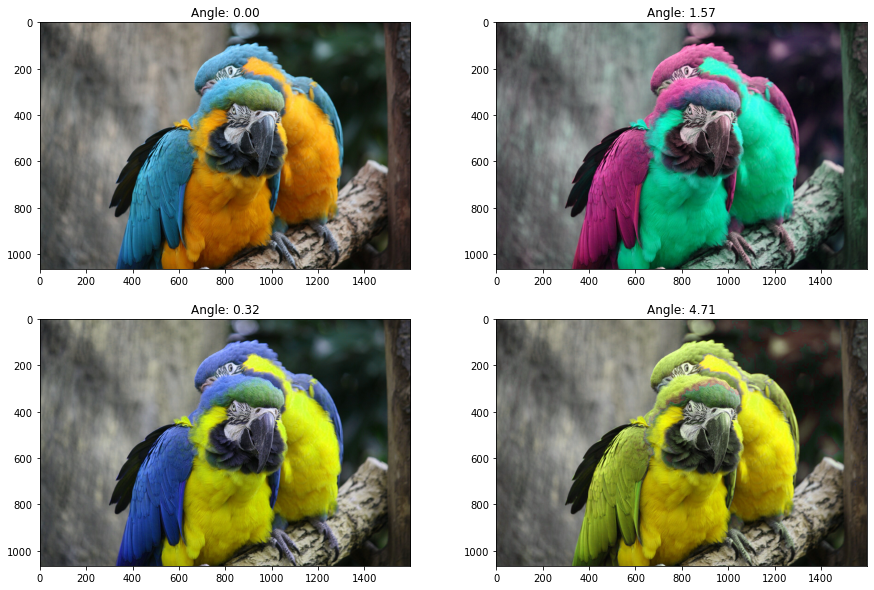

In [67]:

#Rotate and visualize images
fig, axes = plt.subplots(2, len(angles)//2, figsize=(15, 10))

axes = axes.flatten()

for ax, angle in zip(axes, angles):
    rotated_image = rotate_hue(image, angle)
    ax.imshow(rotated_image)
    ax.set_title(f"Angle: {angle:.2f}")

plt.show()

# Exercise 1.4: visualizing the exponential function.


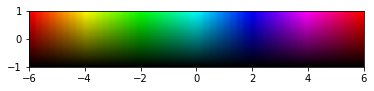

In [80]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Creating our Cartesian grid:

x = np.linspace(-1,1,50)
y = np.linspace(-2*np.pi, 2*np.pi, 50)

X,Y = np.meshgrid(x,y)

# Computing the exponential function:

Z = np.exp(X) * (np.cos(Y)+ 1j*np.sin(Y))

# Converting to polar co-ordinate form
polar_R = np.sqrt(np.square(X)+np.square(Y))
polar_Theta = np.arctan2(Y,X)

# Polar form -> rcosθ+isinθ
polar_Z = polar_R*(np.cos(polar_Theta)+ 1j*np.sin(polar_Theta))



# Normalize the hue and value components:
hue = (polar_Z.real - np.min(polar_Z.real))/(np.max(polar_Z.real)-np.min(polar_Z.real))

value = (polar_Z.imag-np.min(polar_Z.imag))/(np.max(polar_Z.imag)-np.min(polar_Z.imag))


value=value[::-1]

# Set saturation to 1
saturation = np.ones_like(hue)

#Creating the hsv image representation
hsv_image = np.stack((hue,saturation,value), axis = -1)
rgb_image = matplotlib.colors.hsv_to_rgb(hsv_image)

plt.imshow(rgb_image,extent=(-6, 6, -1, 1))